In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
from config import api
import requests

In [5]:
#create set of random lat and long combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
#add lats and lngs to a list
coordinates = list(lat_lngs)

In [7]:
coordinates

[(33.78309516391157, 15.654248419450312),
 (-48.884616524274655, -165.22539663667703),
 (0.005741609686879201, -56.15693219922983),
 (62.45881005653126, 20.2129146926236),
 (-6.449318072251415, -162.53769973750514),
 (49.227510107287515, 38.64660249772962),
 (26.145624965726654, 106.86765178277261),
 (-12.751666754527292, -55.4932197506717),
 (-68.94366851482384, -17.601518114688275),
 (-62.83602999282688, 106.55596963574334),
 (7.451533800439705, -14.096032450417056),
 (-80.50573958768408, 145.63366331954882),
 (-37.69816621511148, 121.22080948494585),
 (-37.680848736892955, -36.963832923444244),
 (79.7473244653994, 171.98069035269748),
 (-44.777971519725384, -114.8133068198445),
 (-32.70661741511905, -55.72215093477638),
 (34.26458063862195, 169.59732325670768),
 (-55.01674372633107, -56.288180387221885),
 (-28.353488404456975, -169.8203208760306),
 (74.86368277469842, 136.80926224384655),
 (-81.67707398096806, -49.01823055467614),
 (85.53465382184811, 34.1637936369971),
 (56.5002103

In [8]:
#create a list for holding cities
cities = []
#id the nearest city for each lat and long comb
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

630

In [9]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api

In [10]:
#create empty list to hold weather data
city_data = []
#print the beginning fo the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

#create counters
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | misratah
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | oriximina
Processing Record 4 of Set 1 | kristiinankaupunki
Processing Record 5 of Set 1 | samusu
City not found. Skipping...
Processing Record 6 of Set 1 | bilokurakyne
Processing Record 7 of Set 1 | guiyang
Processing Record 8 of Set 1 | diamantino
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | goderich
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | esperance
Processing Record 14 of Set 1 | laguna
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | paso de los toros
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Recor

Processing Record 35 of Set 4 | broome
Processing Record 36 of Set 4 | kholm
Processing Record 37 of Set 4 | sao filipe
Processing Record 38 of Set 4 | yarmouth
Processing Record 39 of Set 4 | roma
Processing Record 40 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 41 of Set 4 | saint george
Processing Record 42 of Set 4 | sorong
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | kangaatsiaq
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | riyadh
Processing Record 48 of Set 4 | tarko-sale
Processing Record 49 of Set 4 | ostrovnoy
Processing Record 50 of Set 4 | haibowan
City not found. Skipping...
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | tautira
Processing Record 3 of Set 5 | tumannyy
City not found. Skipping...
Processing Record 4 of Set 5 | ulladulla
Processing Record 5 of Set 5 | tabialan
City not found. Ski

Processing Record 22 of Set 8 | enid
Processing Record 23 of Set 8 | clyde river
Processing Record 24 of Set 8 | mengcheng
Processing Record 25 of Set 8 | nikolskoye
Processing Record 26 of Set 8 | bubaque
Processing Record 27 of Set 8 | phuntsholing
Processing Record 28 of Set 8 | mounana
Processing Record 29 of Set 8 | carutapera
Processing Record 30 of Set 8 | galiwinku
City not found. Skipping...
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | marmande
Processing Record 33 of Set 8 | saldanha
Processing Record 34 of Set 8 | geraldton
Processing Record 35 of Set 8 | banjar
Processing Record 36 of Set 8 | takob
City not found. Skipping...
Processing Record 37 of Set 8 | bombay
Processing Record 38 of Set 8 | villa carlos paz
Processing Record 39 of Set 8 | nishihara
Processing Record 40 of Set 8 | sola
Processing Record 41 of Set 8 | sausar
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | lecce
Processing Record 44 of Set 8 | berleva

Processing Record 10 of Set 12 | wattegama
Processing Record 11 of Set 12 | hofn
Processing Record 12 of Set 12 | dingle
Processing Record 13 of Set 12 | vostok
Processing Record 14 of Set 12 | shestakovo
Processing Record 15 of Set 12 | necochea
Processing Record 16 of Set 12 | lai
Processing Record 17 of Set 12 | prince rupert
Processing Record 18 of Set 12 | luancheng
Processing Record 19 of Set 12 | kaili
Processing Record 20 of Set 12 | nizhneangarsk
Processing Record 21 of Set 12 | sabha
Processing Record 22 of Set 12 | saint-michel-des-saints
Processing Record 23 of Set 12 | bajil
Processing Record 24 of Set 12 | diego de almagro
Processing Record 25 of Set 12 | novikovo
Processing Record 26 of Set 12 | padang
Processing Record 27 of Set 12 | tecoanapa
Processing Record 28 of Set 12 | altamira
Processing Record 29 of Set 12 | whitefish
Processing Record 30 of Set 12 | bulgan
Processing Record 31 of Set 12 | inhambane
Processing Record 32 of Set 12 | meulaboh
Processing Record 33

In [11]:
#convert the array of dicts to a pd df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Misratah,32.3754,15.0925,73.42,77,3,11.34,LY,2021-10-24 22:04:59
1,Avarua,-21.2078,-159.7750,77.05,61,40,13.80,CK,2021-10-24 22:02:51
2,Oriximina,-1.7656,-55.8661,82.42,72,39,3.06,BR,2021-10-24 22:05:00
3,Kristiinankaupunki,62.2743,21.3760,46.35,94,100,16.02,FI,2021-10-24 22:05:00
4,Bilokurakyne,49.5341,38.7307,38.17,72,38,10.22,UA,2021-10-24 22:05:01
5,Guiyang,26.5833,106.7167,52.52,70,100,4.70,CN,2021-10-24 22:00:06
6,Diamantino,-14.4086,-56.4461,72.43,95,99,4.63,BR,2021-10-24 22:05:02
7,Cape Town,-33.9258,18.4232,59.34,67,0,3.00,ZA,2021-10-24 22:00:22
8,Albany,42.6001,-73.9662,53.80,71,100,3.67,US,2021-10-24 22:00:25
9,Goderich,43.7501,-81.7165,51.91,61,96,3.04,CA,2021-10-24 22:05:03


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
re_city_data_df = city_data_df[new_column_order]
re_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Misratah,LY,2021-10-24 22:04:59,32.3754,15.0925,73.42,77,3,11.34
1,Avarua,CK,2021-10-24 22:02:51,-21.2078,-159.7750,77.05,61,40,13.80
2,Oriximina,BR,2021-10-24 22:05:00,-1.7656,-55.8661,82.42,72,39,3.06
3,Kristiinankaupunki,FI,2021-10-24 22:05:00,62.2743,21.3760,46.35,94,100,16.02
4,Bilokurakyne,UA,2021-10-24 22:05:01,49.5341,38.7307,38.17,72,38,10.22
5,Guiyang,CN,2021-10-24 22:00:06,26.5833,106.7167,52.52,70,100,4.70
6,Diamantino,BR,2021-10-24 22:05:02,-14.4086,-56.4461,72.43,95,99,4.63
7,Cape Town,ZA,2021-10-24 22:00:22,-33.9258,18.4232,59.34,67,0,3.00
8,Albany,US,2021-10-24 22:00:25,42.6001,-73.9662,53.80,71,100,3.67
9,Goderich,CA,2021-10-24 22:05:03,43.7501,-81.7165,51.91,61,96,3.04


In [13]:
#create output csv file
output_data_file = "weather_data/cities.csv"
#export the City_Data into a csv
re_city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

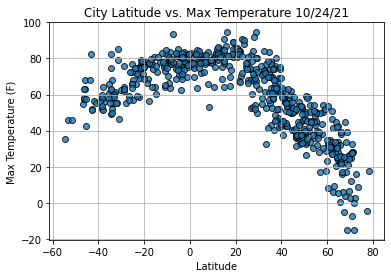

In [15]:
#Import time module
import time

#build the scatter plot for lat vs mx temp
plt.scatter(lats, 
           max_temps, 
           edgecolor="black", linewidths=1, marker="o", 
           alpha=0.8, label="Cities")

#imcoporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the fig
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

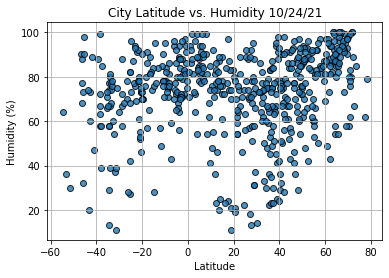

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

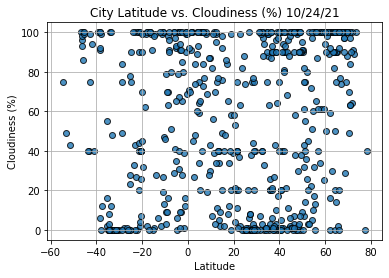

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

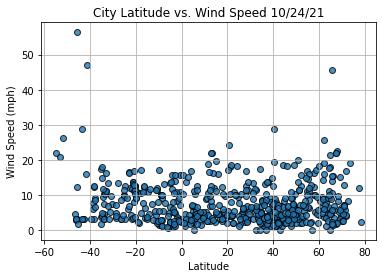

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
#create northern and southern hemisphere dfs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

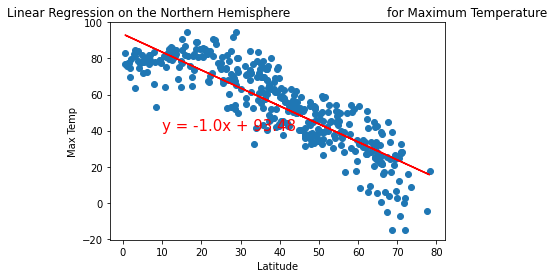

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

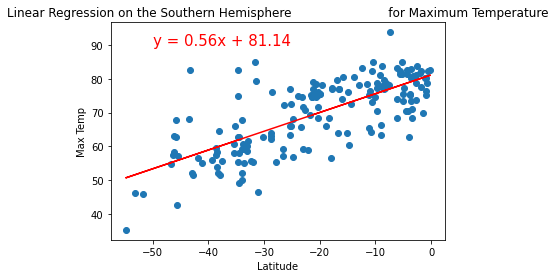

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

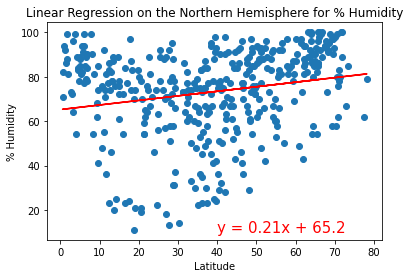

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

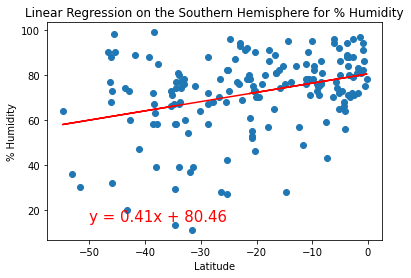

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

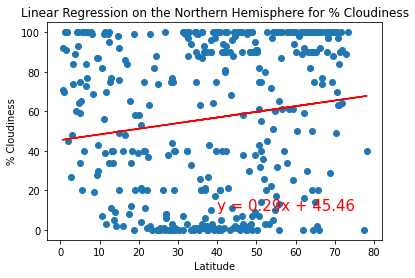

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

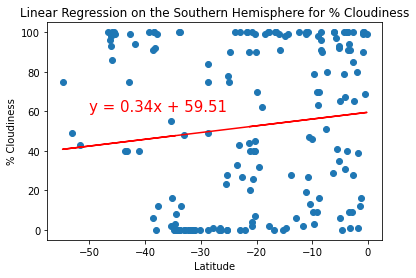

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

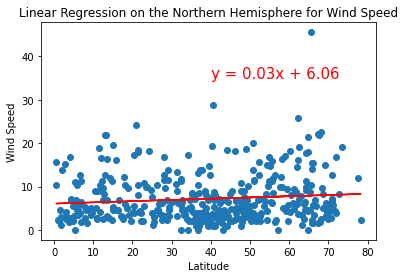

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

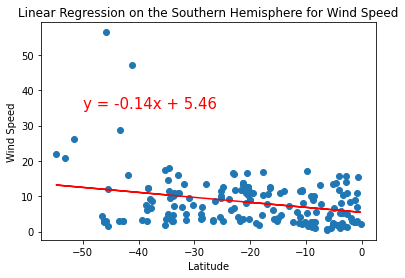

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))